# 1. Imports 

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# constants
#path = 'C:/Users/monte/Documents/Memoria/src'
path = 'C:/Users/asus/Documents/2023_2/Memoria/src'

# Ostar
O_df = pd.read_csv(path+'/Data/o_spectral_lines_trim.csv')
# Bstar
B_df = pd.read_csv(path+'/Data/b_spectral_lines_trim.csv')
# Observed spectra
Obs_df = pd.read_csv(path+'/Data/observed_spectral_lines_trim.csv')

# 2. Data

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

target = ['temperature','g','v']


X = B_df.drop(target,axis = 1)
Y = B_df[target]
X_obs = Obs_df.drop(target,axis=1)
Y_obs = Obs_df[target]


y_scaler = MinMaxScaler()
x_scaler = MinMaxScaler()

x_train, x_val, y_train, y_val = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size=0.75, test_size=0.25, random_state=42)

#x_train = np.random.normal(loc=0, scale=0.01, size=x_train.shape) + x_train

y_scaler = y_scaler.fit(y_train)
y_train = y_scaler.transform(y_train)
y_val = y_scaler.transform(y_val)
y_test = y_scaler.transform(y_test)
y_obs = y_scaler.transform(Y_obs.values)

# Datos sin escalar
# x_scaler = x_scaler.fit(x_train)
# x_train = x_scaler.transform(x_train)
# x_val = x_scaler.transform(x_val)
# x_test = x_scaler.transform(x_test)
# x_obs = x_scaler.transform(X_obs.values)



c:\Users\Asus\Documents\2023_2\Memoria\py310_tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# 3. NN Training with unscaled data

In [37]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 

#input_shape = (4, 10, 128) = (batch_size, steps, vectorLength) = (batchsize, rotaciones, frecuencias)

#normalize = layers.Normalization()

# This layer will shift and scale inputs into a distribution centered around 0 with standard deviation 1.
# It accomplishes this by precomputing the mean and variance of the data and calling (input - mean) / sqrt(var) at runtime

# TODO: Probar con los datos sin normalizar
#normalize.adapt(x_train)

input_shape = (x_train.shape[1],1)

def generate_model(): 
  return tf.keras.Sequential([
  keras.Input(shape=(input_shape)),
  #normalize,
  layers.Conv1D(32,padding="same",kernel_size=3, activation='relu'),
  layers.Conv1D(32,padding="same",kernel_size=3, activation='relu'),
  layers.Conv1D(32,padding="same",kernel_size=3, activation='relu'),
  layers.MaxPooling1D(pool_size=3, padding='same'),
  layers.Conv1D(64,padding="same",kernel_size=2, activation='relu'),
  layers.Conv1D(64,padding="same",kernel_size=2, activation='relu'),
  layers.Conv1D(64,padding="same",kernel_size=2, activation='relu'),
  layers.MaxPooling1D(pool_size=2, padding='same'),
  layers.Conv1D(128,padding="same",kernel_size=2, activation='relu'),
  layers.Conv1D(128,padding="same",kernel_size=2, activation='relu'),
  layers.Conv1D(128,padding="same",kernel_size=2, activation='relu'),
  layers.MaxPooling1D(pool_size=2, padding='same'),
  layers.GlobalAveragePooling1D(),
  
  layers.Dense(128, activation='relu'),
  layers.Dense(3, activation='linear')
])

In [38]:
model = generate_model()
model = tf.keras.Model(inputs=model.input, outputs=model.output) 
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 139, 1)]          0         
                                                                 
 conv1d_27 (Conv1D)          (None, 139, 32)           128       
                                                                 
 conv1d_28 (Conv1D)          (None, 139, 32)           3104      
                                                                 
 conv1d_29 (Conv1D)          (None, 139, 32)           3104      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 47, 32)           0         
 1D)                                                             
                                                                 
 conv1d_30 (Conv1D)          (None, 47, 64)            4160      
                                                           

In [39]:
model.compile(loss = ['MSE'],
                           optimizer = tf.optimizers.Adam(),
                           metrics=['MAE'])

# model.compile(loss='MAE',optimizer=optimizer,metrics=['MSE'])
#history = simple_model.fit(x=x_train, y=y_train, validation_data=(x_val,y_val), epochs=20)

history = model.fit(x=x_train, y=y_train,validation_data=(x_val,y_val), epochs=20)

Epoch 1/20
459/459 [==============================] - 4s 8ms/step - loss: 0.0885 - MAE: 0.2529 - val_loss: 0.0819 - val_MAE: 0.2464
Epoch 2/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0824 - MAE: 0.2462 - val_loss: 0.0823 - val_MAE: 0.2459
Epoch 3/20
459/459 [==============================] - 3s 8ms/step - loss: 0.0720 - MAE: 0.2237 - val_loss: 0.0377 - val_MAE: 0.1405
Epoch 4/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0364 - MAE: 0.1349 - val_loss: 0.0351 - val_MAE: 0.1333
Epoch 5/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0334 - MAE: 0.1298 - val_loss: 0.0345 - val_MAE: 0.1328
Epoch 6/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0258 - MAE: 0.1128 - val_loss: 0.0188 - val_MAE: 0.0944
Epoch 7/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0182 - MAE: 0.0932 - val_loss: 0.0312 - val_MAE: 0.1277
Epoch 8/20
459/459 [==============================] - 3s 8ms/step - loss: 0.

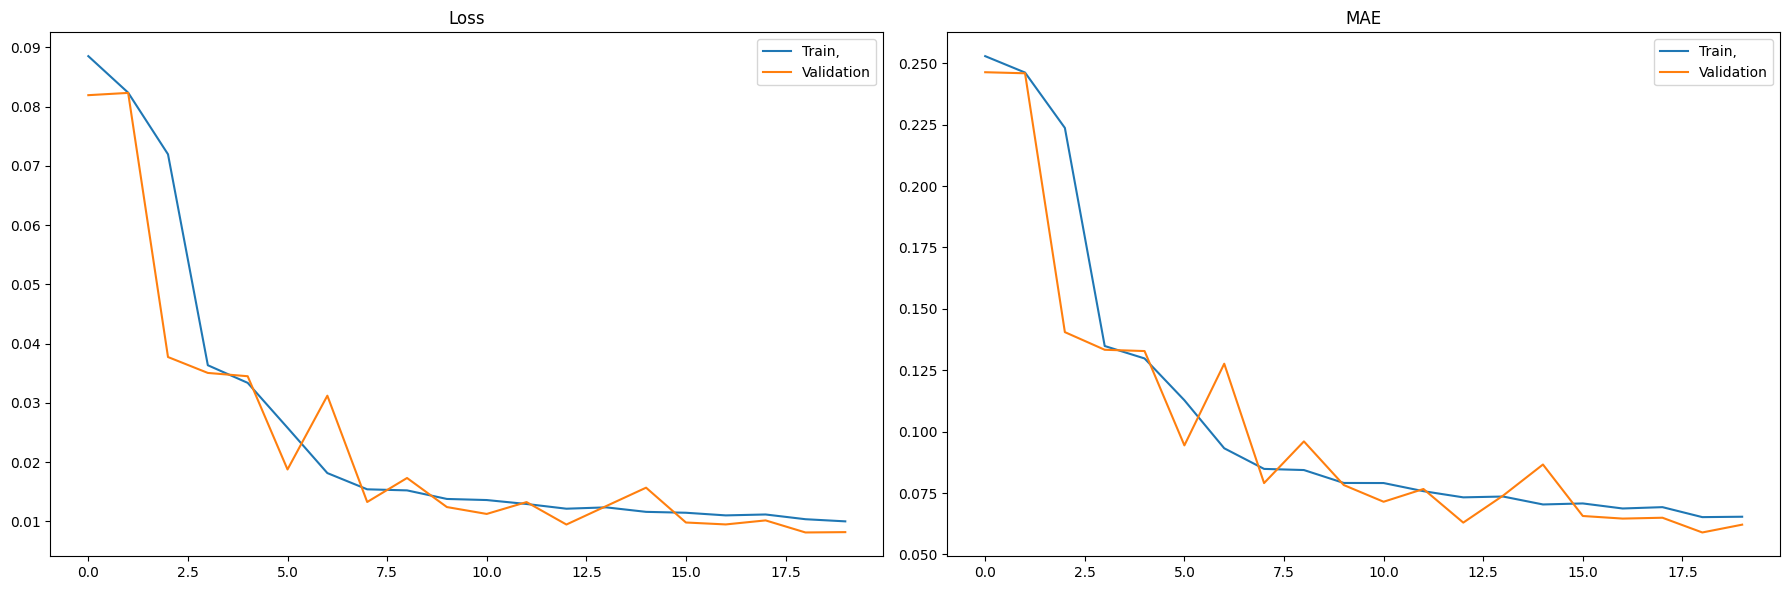

In [40]:
fig, axis = plt.subplots(1, 2, figsize=(18,6))
# trendlines
axis[0].plot(history.history['loss'], label='train t_out_loss')
axis[1].plot(history.history['MAE'], label='val  t_out_loss')
axis[0].plot(history.history['val_loss'], label='train t_out_accuracy')
axis[1].plot(history.history['val_MAE'], label='val t_out_accuracy')

# titles
axis[0].set_title("Loss")
axis[1].set_title("MAE")

# legends
axis[0].legend(['Train,','Validation'])
axis[1].legend(['Train,','Validation'])

plt.tight_layout()
plt.show()

In [50]:
predictions = y_scaler.inverse_transform(model.predict(x_test))

  1/153 [..............................] - ETA: 2s

153/153 [==============================] - 0s 3ms/step


In [42]:
# https://kdepy.readthedocs.io/en/latest/examples.html#minimal-working-example-with-options
from KDEpy import FFTKDE
from sklearn.neighbors import KernelDensity
import numpy as np

def SKL_density_plot(data, ax,title='',low_bound=None,up_bound=None, color='black',alpha=1,label='',kernel='gaussian', bw='silverman',linewidth=1):
  
	if low_bound != None and up_bound != None:
		bw = FFTKDE(bw=bw, kernel='gaussian').fit(data.reshape(-1,1)).bw
		kde = KernelDensity(bandwidth=bw, kernel=kernel).fit(data.reshape(-1,1))
		data = np.concatenate((data, 2 * low_bound - data, 2 * up_bound - data))
		kde = KernelDensity(bandwidth=kde.bandwidth_, kernel=kernel).fit(data.reshape(-1,1))
		x = np.linspace(low_bound,up_bound,1000)
		y = np.exp(kde.score_samples(x.reshape(-1,1)))
		plot_y = y[np.where((x>=low_bound) & (x<=up_bound))] # Set the KDE to zero outside of the domain
		plot_x = x[np.where((x>=low_bound) & (x<=up_bound))]  # Set the KDE to zero outside of the domain
		plot_y = np.append(plot_y,[0]) # Set the KDE to zero outside of the domain
		plot_x = np.append(plot_x,[up_bound])  # Set the KDE to zero outside of the domain
		plot_y = np.insert(plot_y,[0],[0]) # Set the KDE to zero outside of the domain
		plot_x = np.insert(plot_x,[0],[low_bound])  # Set the KDE to zero outside of the domain
		plot_y = plot_y * 3  # Double the y-values to get integral of ~1
		ax.plot(plot_x, plot_y, label=label,color=color,alpha=alpha,linewidth=linewidth)
		return x, y, kde
	else:
		kde = KernelDensity(bandwidth=bw, kernel=kernel).fit(data.reshape(-1,1))
		x=np.linspace(data.min(),data.max(),1000)
		y = np.exp(kde.score_samples(x.reshape(-1,1)))
		ax.plot(x, y, label=label,color=color,alpha=alpha)
		return x, y, kde


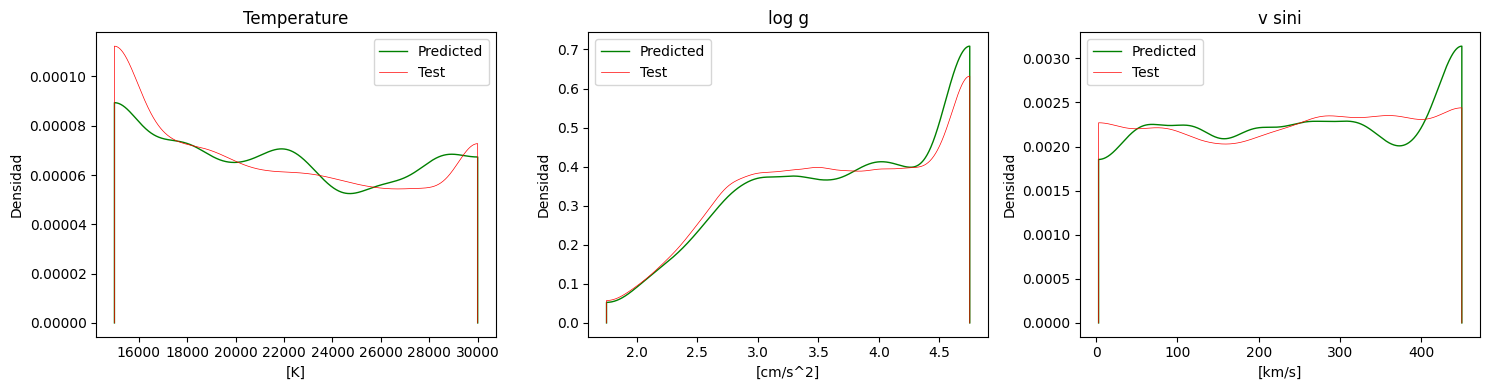

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

for i, featureName in enumerate(target):
	SKL_density_plot(predictions[:,i], axes[i], featureName, low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'green',label='Predicted')
	SKL_density_plot(y_scaler.inverse_transform(y_test)[:,i], axes[i], featureName, low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color='red',linewidth=0.5,label='Test')
	axes[i].set_title(target[i])
	measure = ['Temperature','log g', 'v sini']
	measure_unit = ['[K]', '[cm/s^2]', '[km/s]']
	axes[i].set_xlabel(measure_unit[i])
	axes[i].set_ylabel('Densidad')
	axes[i].set_title(measure[i])
	axes[i].legend()

plt.legend()
plt.tight_layout();
plt.show()

In [44]:
predictions = y_scaler.inverse_transform(model.predict(X_obs))
results = Y_obs.join(pd.DataFrame(predictions, columns = ['pred_temperature','pred_g','pred_v']))
results

1/1 [==============================] - 0s 292ms/step


,temperature,g,v,pred_temperature,pred_g,pred_v
0,15000.0,3.40,68.0,17979.023438,4.325264,129.688171
1,18400.0,3.50,40.0,27388.701172,4.550713,115.685425
2,30000.0,3.53,150.0,18158.583984,3.142600,138.584167
3,22000.0,3.90,280.0,22858.757812,4.323876,309.090668
4,24500.0,3.40,215.0,20167.787109,2.786795,248.409271
5,22000.0,3.50,180.0,26068.599609,4.053905,251.272278
6,20000.0,3.56,10.0,20413.687500,3.810008,60.434803
7,18000.0,3.53,250.0,31074.417969,4.088064,261.249603
8,26000.0,2.90,300.0,27622.328125,2.853421,282.765686


# 4. Training with scaled data

In [45]:
x_scaler = x_scaler.fit(x_train)
x_train = x_scaler.transform(x_train)
x_val = x_scaler.transform(x_val)
x_test = x_scaler.transform(x_test)
x_obs = x_scaler.transform(X_obs.values)

c:\Users\Asus\Documents\2023_2\Memoria\py310_tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [46]:
model = generate_model()
model = tf.keras.Model(inputs=model.input, outputs=model.output) 

model.compile(loss = ['MSE'],
                           optimizer = tf.optimizers.Adam(),
                           metrics=['MAE'])

# model.compile(loss='MAE',optimizer=optimizer,metrics=['MSE'])
#history = simple_model.fit(x=x_train, y=y_train, validation_data=(x_val,y_val), epochs=20)

history = model.fit(x=x_train, y=y_train,validation_data=(x_val,y_val), epochs=20)

Epoch 1/20
459/459 [==============================] - 4s 8ms/step - loss: 0.0552 - MAE: 0.1800 - val_loss: 0.0313 - val_MAE: 0.1253
Epoch 2/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0236 - MAE: 0.1120 - val_loss: 0.0165 - val_MAE: 0.0997
Epoch 3/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0136 - MAE: 0.0840 - val_loss: 0.0095 - val_MAE: 0.0729
Epoch 4/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0093 - MAE: 0.0684 - val_loss: 0.0071 - val_MAE: 0.0637
Epoch 5/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0068 - MAE: 0.0583 - val_loss: 0.0059 - val_MAE: 0.0550
Epoch 6/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0047 - MAE: 0.0487 - val_loss: 0.0033 - val_MAE: 0.0422
Epoch 7/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0039 - MAE: 0.0444 - val_loss: 0.0044 - val_MAE: 0.0475
Epoch 8/20
459/459 [==============================] - 3s 7ms/step - loss: 0.

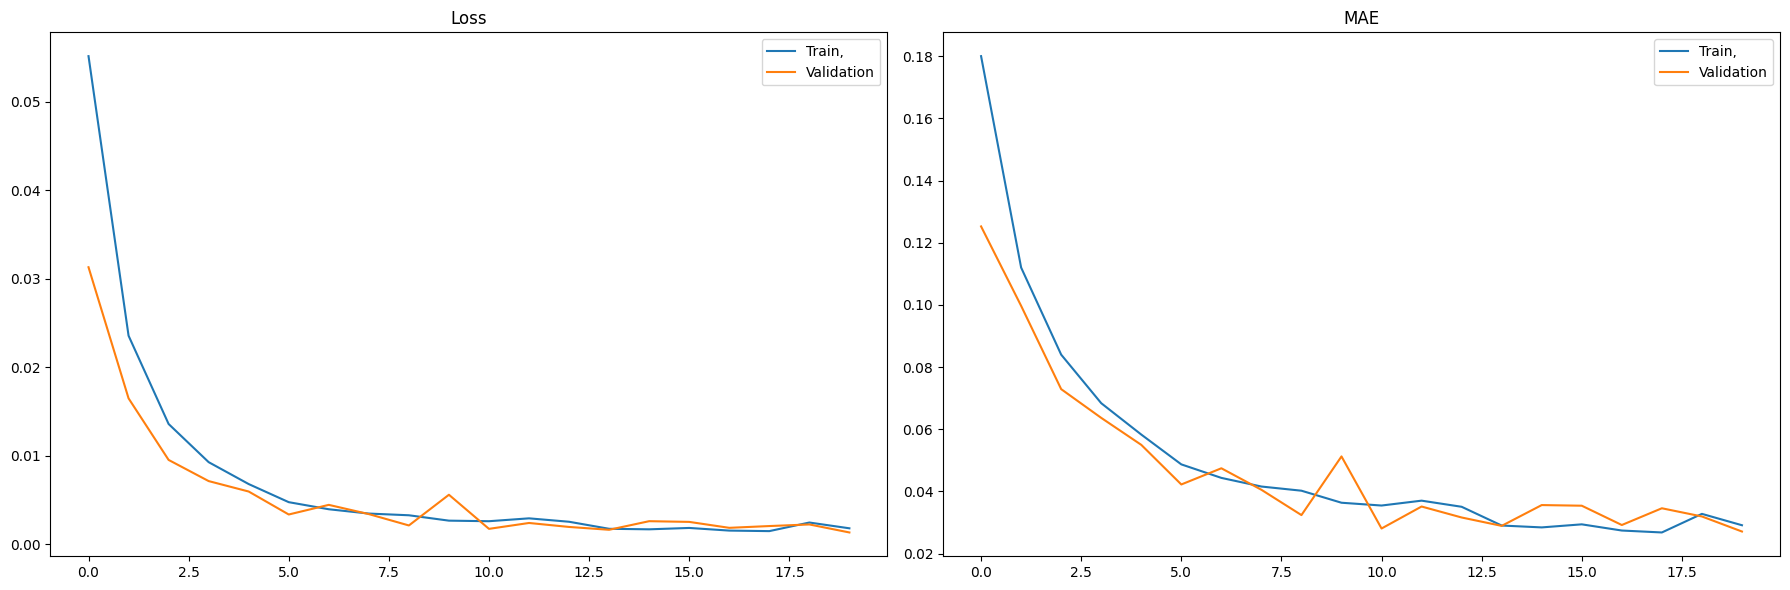

In [47]:
fig, axis = plt.subplots(1, 2, figsize=(18,6))
# trendlines
axis[0].plot(history.history['loss'], label='train t_out_loss')
axis[1].plot(history.history['MAE'], label='val  t_out_loss')
axis[0].plot(history.history['val_loss'], label='train t_out_accuracy')
axis[1].plot(history.history['val_MAE'], label='val t_out_accuracy')

# titles
axis[0].set_title("Loss")
axis[1].set_title("MAE")

# legends
axis[0].legend(['Train,','Validation'])
axis[1].legend(['Train,','Validation'])

plt.tight_layout()
plt.show()

In [54]:
predictions = y_scaler.inverse_transform(model.predict(x_test))

153/153 [==============================] - 0s 3ms/step


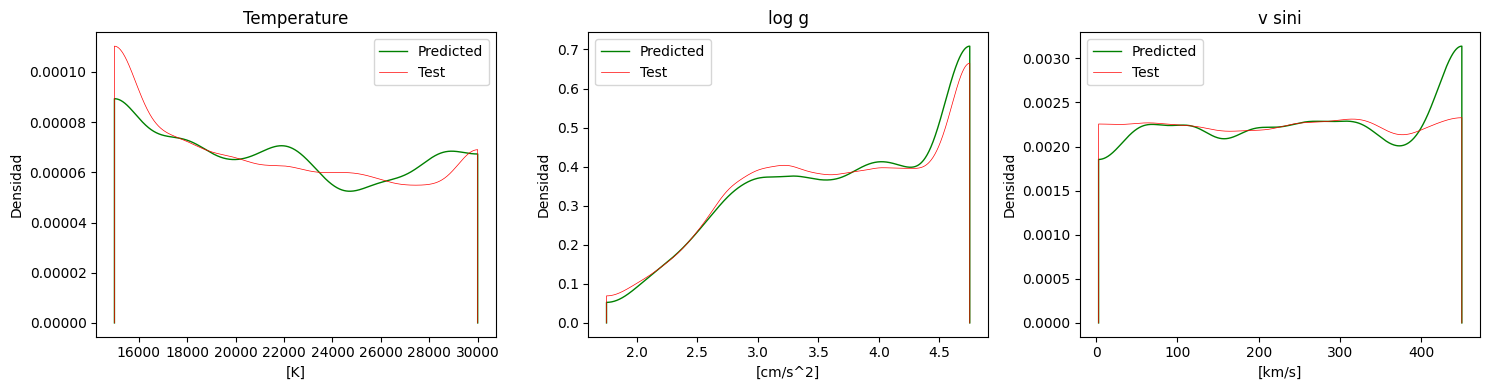

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

for i, featureName in enumerate(target):
	SKL_density_plot(predictions[:,i], axes[i], featureName, low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'green',label='Predicted')
	SKL_density_plot(y_scaler.inverse_transform(y_test)[:,i], axes[i], featureName, low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color='red',linewidth=0.5,label='Test')
	axes[i].set_title(target[i])
	measure = ['Temperature','log g', 'v sini']
	measure_unit = ['[K]', '[cm/s^2]', '[km/s]']
	axes[i].set_xlabel(measure_unit[i])
	axes[i].set_ylabel('Densidad')
	axes[i].set_title(measure[i])
	axes[i].legend()

plt.legend()
plt.tight_layout();
plt.show()

In [57]:
predictions = y_scaler.inverse_transform(model.predict(X_obs))
results = Y_obs.join(pd.DataFrame(predictions, columns = ['pred_temperature','pred_g','pred_v']))
results

1/1 [==============================] - 0s 109ms/step


,temperature,g,v,pred_temperature,pred_g,pred_v
0,15000.0,3.40,68.0,14893.186523,1.779167,161.899124
1,18400.0,3.50,40.0,17352.154297,2.177631,190.399826
2,30000.0,3.53,150.0,17723.097656,2.009917,163.740158
3,22000.0,3.90,280.0,17587.363281,2.071330,229.627121
4,24500.0,3.40,215.0,15611.905273,2.050298,199.987534
5,22000.0,3.50,180.0,19729.789062,2.312148,191.681580
6,20000.0,3.56,10.0,18146.845703,2.216581,157.516022
7,18000.0,3.53,250.0,18553.900391,2.326026,188.902771
8,26000.0,2.90,300.0,15303.413086,1.944731,138.457565


# 5. Scaled Data and Noise addition

In [58]:
x_train = np.random.normal(loc=0, scale=0.01, size=x_train.shape) + x_train

x_scaler = x_scaler.fit(x_train)
x_train = x_scaler.transform(x_train)
x_val = x_scaler.transform(x_val)
x_test = x_scaler.transform(x_test)
x_obs = x_scaler.transform(X_obs.values)

In [59]:
model = generate_model()
model = tf.keras.Model(inputs=model.input, outputs=model.output) 

model.compile(loss = ['MSE'],
                           optimizer = tf.optimizers.Adam(),
                           metrics=['MAE'])

# model.compile(loss='MAE',optimizer=optimizer,metrics=['MSE'])
#history = simple_model.fit(x=x_train, y=y_train, validation_data=(x_val,y_val), epochs=20)

history = model.fit(x=x_train, y=y_train,validation_data=(x_val,y_val), epochs=20)

Epoch 1/20
459/459 [==============================] - 4s 8ms/step - loss: 0.0541 - MAE: 0.1762 - val_loss: 0.0205 - val_MAE: 0.1055
Epoch 2/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0176 - MAE: 0.0971 - val_loss: 0.0172 - val_MAE: 0.0942
Epoch 3/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0134 - MAE: 0.0823 - val_loss: 0.0119 - val_MAE: 0.0739
Epoch 4/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0101 - MAE: 0.0698 - val_loss: 0.0066 - val_MAE: 0.0574
Epoch 5/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0073 - MAE: 0.0596 - val_loss: 0.0054 - val_MAE: 0.0484
Epoch 6/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0055 - MAE: 0.0516 - val_loss: 0.0048 - val_MAE: 0.0512
Epoch 7/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0046 - MAE: 0.0469 - val_loss: 0.0071 - val_MAE: 0.0613
Epoch 8/20
459/459 [==============================] - 3s 7ms/step - loss: 0.

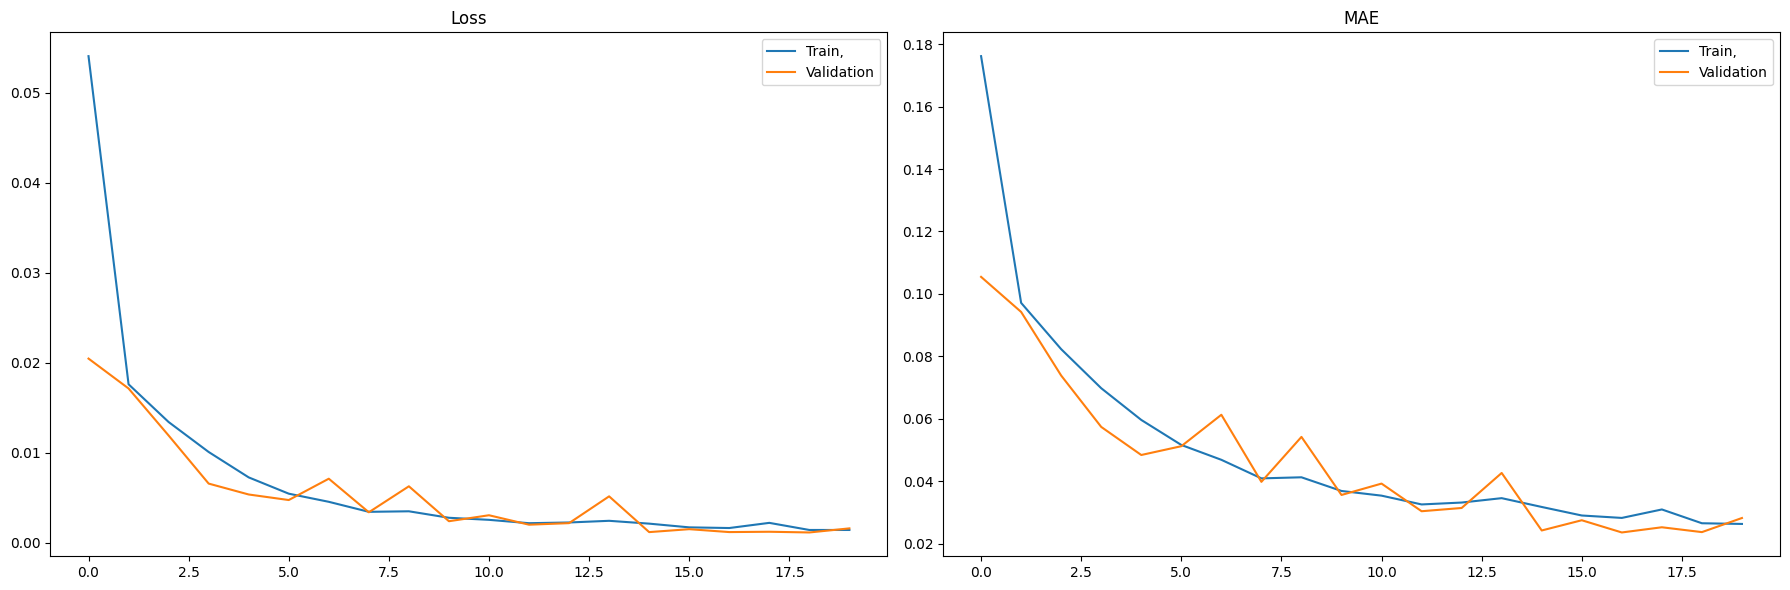

In [60]:
fig, axis = plt.subplots(1, 2, figsize=(18,6))
# trendlines
axis[0].plot(history.history['loss'], label='train t_out_loss')
axis[1].plot(history.history['MAE'], label='val  t_out_loss')
axis[0].plot(history.history['val_loss'], label='train t_out_accuracy')
axis[1].plot(history.history['val_MAE'], label='val t_out_accuracy')

# titles
axis[0].set_title("Loss")
axis[1].set_title("MAE")

# legends
axis[0].legend(['Train,','Validation'])
axis[1].legend(['Train,','Validation'])

plt.tight_layout()
plt.show()

In [61]:
predictions = y_scaler.inverse_transform(model.predict(x_test))

153/153 [==============================] - 0s 2ms/step


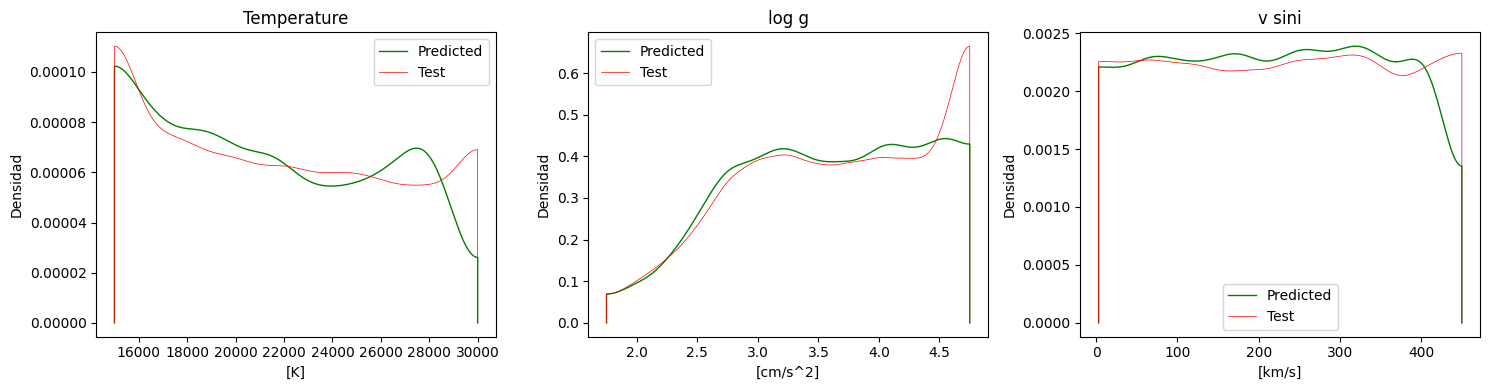

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

for i, featureName in enumerate(target):
	SKL_density_plot(predictions[:,i], axes[i], featureName, low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'green',label='Predicted')
	SKL_density_plot(y_scaler.inverse_transform(y_test)[:,i], axes[i], featureName, low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color='red',linewidth=0.5,label='Test')
	axes[i].set_title(target[i])
	measure = ['Temperature','log g', 'v sini']
	measure_unit = ['[K]', '[cm/s^2]', '[km/s]']
	axes[i].set_xlabel(measure_unit[i])
	axes[i].set_ylabel('Densidad')
	axes[i].set_title(measure[i])
	axes[i].legend()

plt.legend()
plt.tight_layout();
plt.show()

In [63]:
predictions = y_scaler.inverse_transform(model.predict(X_obs))
results = Y_obs.join(pd.DataFrame(predictions, columns = ['pred_temperature','pred_g','pred_v']))
results

1/1 [==============================] - 0s 110ms/step


,temperature,g,v,pred_temperature,pred_g,pred_v
0,15000.0,3.40,68.0,12491.278320,1.758611,155.835510
1,18400.0,3.50,40.0,16519.902344,2.031187,217.447266
2,30000.0,3.53,150.0,13715.803711,1.759559,188.502808
3,22000.0,3.90,280.0,15190.629883,2.046773,202.758224
4,24500.0,3.40,215.0,13700.939453,2.024369,185.065094
5,22000.0,3.50,180.0,14547.498047,1.908791,193.445602
6,20000.0,3.56,10.0,15806.042969,2.002166,155.472809
7,18000.0,3.53,250.0,14835.726562,1.987709,205.298279
8,26000.0,2.90,300.0,11146.535156,2.023316,78.091972
